In [1]:

# using Pkg; Pkg.add("LaTeXStrings");
using LaTeXStrings
using Plots;

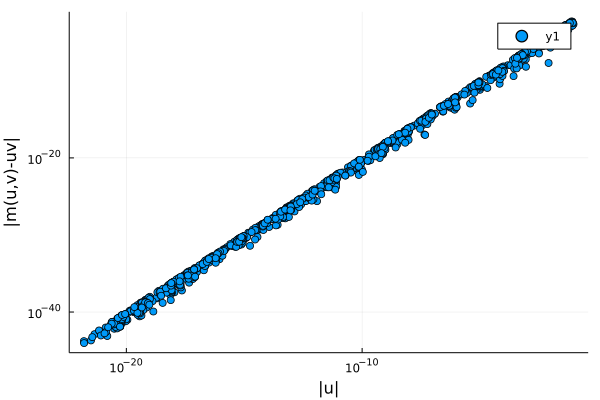

In [2]:
o = 10.0
u = 4.0
v = 3.0

input = [u; v]

delta = 100
function sigmoid(x)
    return 1.0/(1.0+exp(-(x+delta)))
end

sigma(x) = sigmoid(x)

function ds(x)
    return exp(-x)/(exp(-x)+1)^2
end

function d2s(x)
    return 2*exp(-2*(x+delta))/(exp(-(x+delta))+1)^3 - exp(-(x+delta))/(exp(-(x+delta))+1)^2
end


function m(input)
    return (sigma(u+v)+sigma(-u-v)-sigma(u-v)-sigma(u+v))/(4*d2s(0))
end

n = 1000
data = rand(n,2);

for i in 1:n
    u = rand()*10^(-1.0*rand(1:20));
    v = u*rand() # rand()*10^(-1.0*rand(1:20));
    input = [u; v]
    data[i,1] = abs(u) #max(abs(u),abs(v))
    data[i,2] = abs(m(input)-u*v)
end

plot(data[:,1], data[:,2], seriestype = :scatter, xaxis=:log, yaxis=:log, xlabel="|u|", ylabel="|m(u,v)-uv|")

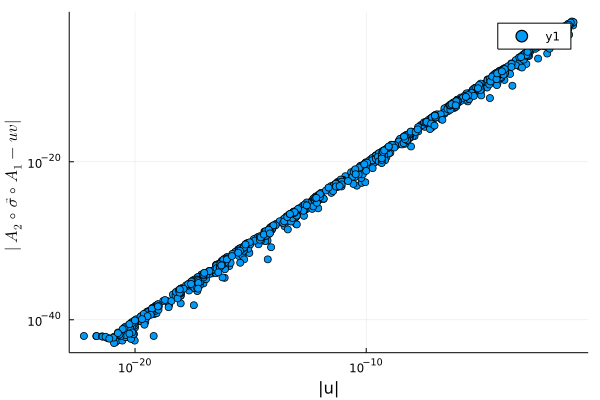

In [3]:
n = 1000
data = rand(n,2);

delta = 100.0
function sigmoid(x)
    return 1.0/(1.0+exp(-(x+delta)))
end

function d2s(x)
    return 2*exp(-2*(x+delta))/(exp(-(x+delta))+1)^3 - exp(-(x+delta))/(exp(-(x+delta))+1)^2
end


b = delta

function A1(x)
    W1 = [[+1.0, -1.0, +1.0, -1.0] [+1.0, -1.0, -1.0, +1.0]]
    b1 = [b, b, b, b]
    return W1*x+b1
end

function A2(x)
    lambda = 0.25*d2s(0)
    W2 = lambda * [[1.0] [1.0] [1.0] [1.0]]
    b2 = lambda * [-b]
    return W2*x+b2
end

function f(input)
    l1 = sigmoid.(A1(input))
    return A2(l1)
end


sigma(x) = sigmoid(x)

for i in 1:n
    u = rand()*10^(-1.0*rand(1:20));
    v = u*rand() # rand()*10^(-1.0*rand(1:20));
    input = [u; v]
    data[i,1] = max(abs(u),abs(v))
    data[i,2] = abs.(sum(f(input))-u*v)
end

data

plot(data[:,1], data[:,2], seriestype = :scatter, xaxis=:log, yaxis=:log, xlabel="|u|", ylabel=L"|A_2\circ \vec{\sigma}\circ A_1-uv|")